In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bbe5a870eed2cc340c5eda687dc6c377


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | clarence town
Processing Record 2 of Set 1 | januaria
Processing Record 3 of Set 1 | farafangana
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | bykovo
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | tambul
City not found. Skipping...
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | neuquen
Processing Record 14 of Set 1 | san quintin
Processing Record 15 of Set 1 | lolua
City not found. Skipping...
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | shiyan
Processing Record 18 of Set 1 | tiruchchendur
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | waingapu
Processing Record 21 of Set 1 | af

Processing Record 34 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 35 of Set 4 | kyrylivka
Processing Record 36 of Set 4 | stavern
Processing Record 37 of Set 4 | hilo
Processing Record 38 of Set 4 | poronaysk
Processing Record 39 of Set 4 | kloulklubed
Processing Record 40 of Set 4 | klaksvik
Processing Record 41 of Set 4 | leona vicario
Processing Record 42 of Set 4 | lata
Processing Record 43 of Set 4 | rock springs
Processing Record 44 of Set 4 | port macquarie
Processing Record 45 of Set 4 | cidreira
Processing Record 46 of Set 4 | makung
City not found. Skipping...
Processing Record 47 of Set 4 | boca do acre
Processing Record 48 of Set 4 | sao filipe
Processing Record 49 of Set 4 | prince rupert
Processing Record 50 of Set 4 | genhe
Processing Record 1 of Set 5 | merauke
Processing Record 2 of Set 5 | parker
Processing Record 3 of Set 5 | iquique
Processing Record 4 of Set 5 | raudeberg
Processing Record 5 of Set 5 | ketchikan
Processing Record 6 of Set 5 | v

Processing Record 28 of Set 8 | bayan
Processing Record 29 of Set 8 | saluzzo
Processing Record 30 of Set 8 | ahipara
Processing Record 31 of Set 8 | harper
Processing Record 32 of Set 8 | maniitsoq
Processing Record 33 of Set 8 | isangel
Processing Record 34 of Set 8 | grand centre
City not found. Skipping...
Processing Record 35 of Set 8 | qaqortoq
Processing Record 36 of Set 8 | hami
Processing Record 37 of Set 8 | mataiea
City not found. Skipping...
Processing Record 38 of Set 8 | clyde river
Processing Record 39 of Set 8 | tiznit
Processing Record 40 of Set 8 | brae
Processing Record 41 of Set 8 | maroantsetra
Processing Record 42 of Set 8 | grenada
Processing Record 43 of Set 8 | buala
Processing Record 44 of Set 8 | la rioja
Processing Record 45 of Set 8 | port blair
Processing Record 46 of Set 8 | ust-kuyga
Processing Record 47 of Set 8 | russell
Processing Record 48 of Set 8 | babushkin
Processing Record 49 of Set 8 | oistins
Processing Record 50 of Set 8 | itarema
Processing 

Processing Record 21 of Set 12 | havoysund
Processing Record 22 of Set 12 | san cristobal
Processing Record 23 of Set 12 | catalao
Processing Record 24 of Set 12 | verkhniy baskunchak
Processing Record 25 of Set 12 | lima
Processing Record 26 of Set 12 | tenango
Processing Record 27 of Set 12 | dunedin
Processing Record 28 of Set 12 | camden
Processing Record 29 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 30 of Set 12 | san andres
Processing Record 31 of Set 12 | ayapel
Processing Record 32 of Set 12 | kavaratti
Processing Record 33 of Set 12 | spring
Processing Record 34 of Set 12 | maryborough
Processing Record 35 of Set 12 | aguas vermelhas
Processing Record 36 of Set 12 | petatlan
Processing Record 37 of Set 12 | macapa
Processing Record 38 of Set 12 | sinnamary
Processing Record 39 of Set 12 | manzanillo
Processing Record 40 of Set 12 | grindavik
Processing Record 41 of Set 12 | dubti
Processing Record 42 of Set 12 | pasaje
Processing Record 43 of Set 12 | 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Clarence Town,-32.5833,151.7833,73.99,56,90,18.41,AU,2021-03-05 06:39:33
1,Januaria,-15.4833,-44.3667,66.20,80,15,1.21,BR,2021-03-05 06:45:29
2,Farafangana,-22.8167,47.8333,85.82,63,34,2.73,MG,2021-03-05 06:45:29
3,Rikitea,-23.1203,-134.9692,81.34,81,0,5.77,PF,2021-03-05 06:45:29
4,Albany,42.6001,-73.9662,21.20,38,90,19.57,US,2021-03-05 06:44:35
5,Ushuaia,-54.8000,-68.3000,57.20,28,90,13.80,AR,2021-03-05 06:45:31
6,Bykovo,55.6361,38.0803,24.80,80,0,6.71,RU,2021-03-05 06:45:31
7,Cape Town,-33.9258,18.4232,69.01,60,0,3.44,ZA,2021-03-05 06:33:42
8,Esperance,-33.8667,121.9000,73.40,88,90,9.22,AU,2021-03-05 06:38:40
9,Atuona,-9.8000,-139.0333,79.72,75,17,14.79,PF,2021-03-05 06:32:55


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Clarence Town,AU,2021-03-05 06:39:33,-32.5833,151.7833,73.99,56,90,18.41
1,Januaria,BR,2021-03-05 06:45:29,-15.4833,-44.3667,66.20,80,15,1.21
2,Farafangana,MG,2021-03-05 06:45:29,-22.8167,47.8333,85.82,63,34,2.73
3,Rikitea,PF,2021-03-05 06:45:29,-23.1203,-134.9692,81.34,81,0,5.77
4,Albany,US,2021-03-05 06:44:35,42.6001,-73.9662,21.20,38,90,19.57
...,...,...,...,...,...,...,...,...,...
554,Camp Verde,US,2021-03-05 06:52:00,34.5636,-111.8543,44.01,73,0,4.00
555,Khowst,AF,2021-03-05 06:51:59,33.3833,69.8833,68.95,9,0,3.24
556,West Bay,KY,2021-03-05 06:44:34,19.3667,-81.4167,82.00,64,0,1.99
557,Alekseyevsk,RU,2021-03-05 06:52:01,57.8406,108.3492,9.45,86,62,7.61


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

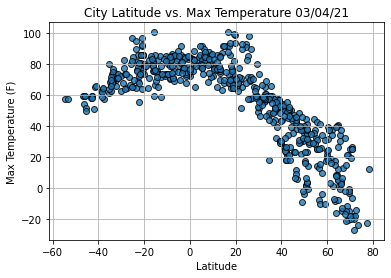

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

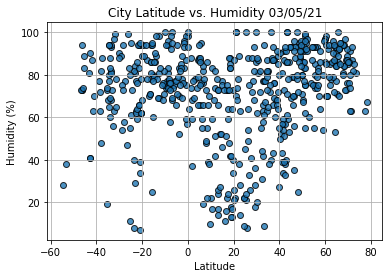

In [19]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


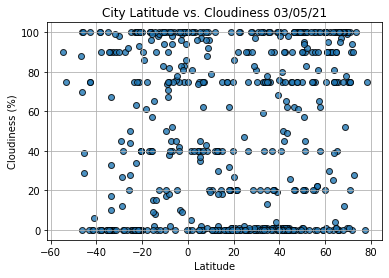

In [20]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

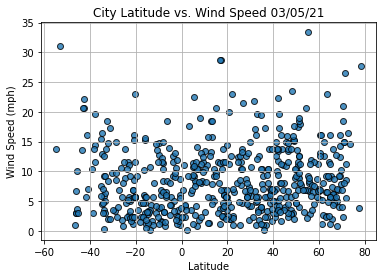

In [21]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()